<a href="https://colab.research.google.com/github/Sanj-bot/pytorch/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib as plt
%matplotlib inline

In [2]:
transform=transforms.ToTensor()


In [3]:
train_data=datasets.MNIST(root='/cnn_data',train=True,transform=transform, download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 53596009.98it/s]


Extracting /cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1927469.79it/s]

Extracting /cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14776030.23it/s]


Extracting /cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /cnn_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8041590.87it/s]

Extracting /cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /cnn_data/MNIST/raw



In [4]:
test_data=datasets.MNIST(root='/cnn_data',train=False,transform=transform, download=True)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
pwd

'/content'

In [7]:
ls

sample_data/


In [8]:
cd ../


/


In [9]:
pwd

'/'

In [10]:
ls

bin@                        datalab/  lib@     mnt/                      root/  tmp/
boot/                       dev/      lib32@   NGC-DL-CONTAINER-LICENSE  run/   tools/
cnn_data/                   etc/      lib64@   opt/                      sbin@  usr/
content/                    home/     libx32@  proc/                     srv/   var/
cuda-keyring_1.0-1_all.deb  kaggle/   media/   python-apt/               sys/


In [11]:
cd cnn_data

/cnn_data


In [12]:
ls

MNIST/


In [13]:
cd MNIST

/cnn_data/MNIST


In [14]:
ls


raw/


In [15]:
cd raw

/cnn_data/MNIST/raw


In [16]:
ls

t10k-images-idx3-ubyte     t10k-labels-idx1-ubyte.gz   train-labels-idx1-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte     train-labels-idx1-ubyte.gz
t10k-labels-idx1-ubyte     train-images-idx3-ubyte.gz


In [17]:
#Convolution and pooling layers

In [18]:
#create a small batch size for images.....
train_loader=DataLoader(train_data,batch_size=10,shuffle=True)

In [19]:
test_loader=DataLoader(train_data,batch_size=10,shuffle=False)

In [20]:
#Define CNN Model
#define cnn layer and what its doing (2 conv layer)
conv1=nn.Conv2d(1,6,3,1)
conv2=nn.Conv2d(6,16,3,1)

In [21]:
#grab 1 MNIST record/image
for i, (X_train,y_train) in enumerate(train_data):
  break

In [22]:
X_train.shape

torch.Size([1, 28, 28])

In [23]:
x=X_train.view(1,1,28,28)

In [24]:
#Perform our first convolution
x=F.relu(conv1(x)) # Rectified linear unit for our activation function

In [25]:
x.shape

torch.Size([1, 6, 26, 26])

In [26]:
#pass thru the pooling layer
x=F.max_pool2d(x,2,2) #kernel of 2 and stride of 2

In [27]:
x.shape

torch.Size([1, 6, 13, 13])

In [28]:
#do our 2nd convolutional layer
x=F.relu(conv2(x))

In [29]:
x.shape
#again we didn't set padding so we loose 2 pixels around the outside of the image

torch.Size([1, 16, 11, 11])

In [30]:
#Padding layer
x=F.max_pool2d(x,2,2)
x.shape # 11/2


torch.Size([1, 16, 5, 5])

In [31]:
#16/19

In [32]:
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(1,6,3,1)
    self.conv2=nn.Conv2d(6,16,3,1)
    #Fully connected layer
    self.fc1=nn.Linear(5*5*16,120)
    self.fc2=nn.Linear(120,84)
    self.fc3=nn.Linear(84,10)
  def forward(self,X):
    X=F.relu(self.conv1(X))
    X=F.max_pool2d(X,2,2)
    #2x2 kernal and stride 2
    #Second pass
    X=F.relu(self.conv2(X))
    X=F.max_pool2d(X,2,2)
    #2x2 kernal and stride 2

    #Review to flatten it out
    X=X.view(-1,16*5*5)
    #Negative one so that

    #Fully connected layers
    X=F.relu(self.fc1(X))
    X=F.relu(self.fc2(X))
    X=self.fc3(X)
    return F.log_softmax(X,dim=1)

In [33]:
#create an instance of our model
torch.manual_seed(41)
model=ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [36]:
#LOSS function optimizer
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [39]:
  import time
  start_time=time.time()
  #create variable to track things
  epochs=5
  train_losses=[]
  test_losses=[]
  train_correct=[]
  test_correct=[]
  # for loop of epochs
  for i in range(epochs):
    trn_corr=0
    tst_corr=0
    #train
    for b,(X_train,y_train) in enumerate(train_loader):
      b+=1 #Start our batches at 1
      y_pred=model(X_train)
      #get predicted values from the training Set Not Flattened 2d
      loss=criterion(y_pred,y_train)
      predicted=torch.max(y_pred.data,1)[1]
      batch_corr=(predicted==y_train).sum()
      trn_corr+=batch_corr
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if b%600==0:
        print(f'Epoch:{i} Batch:{b} Loss:{loss.item()}')
    train_losses.append(loss)
    train_correct.append(trn_corr)
    with torch.no_grad():
      for b,(X_test,y_test) in enumerate(test_loader):
        y_val=model(X_test)
        predicted=torch.max(y_val.data,1)[1]
        tst_corr+=(predicted==y_test).sum()
      loss=criterion(y_val,y_test)
      test_losses.append(loss)
      test_correct.append(tst_corr)

current_time=time.time()
total=current_time-start_time
print(f'Training Took:{total/60}minutes!')


Epoch:0 Batch:600 Loss:9.148248500423506e-05
Epoch:0 Batch:1200 Loss:1.4519040632876568e-05
Epoch:0 Batch:1800 Loss:2.137212322850246e-05
Epoch:0 Batch:2400 Loss:3.7073666590003995e-06
Epoch:0 Batch:3000 Loss:3.3316762710455805e-05
Epoch:0 Batch:3600 Loss:3.548662061803043e-05
Epoch:0 Batch:4200 Loss:7.663416909053922e-05
Epoch:0 Batch:4800 Loss:0.0031170013826340437
Epoch:0 Batch:5400 Loss:0.0013286955654621124
Epoch:0 Batch:6000 Loss:0.12756387889385223
Epoch:1 Batch:600 Loss:0.0001225222513312474
Epoch:1 Batch:1200 Loss:9.696783672552556e-05
Epoch:1 Batch:1800 Loss:4.315314981795382e-06
Epoch:1 Batch:2400 Loss:0.0004078327619936317
Epoch:1 Batch:3000 Loss:0.00985028687864542
Epoch:1 Batch:3600 Loss:0.00045260158367455006
Epoch:1 Batch:4200 Loss:6.494995614048094e-05
Epoch:1 Batch:4800 Loss:0.08263324201107025
Epoch:1 Batch:5400 Loss:7.114106847438961e-05
Epoch:1 Batch:6000 Loss:0.0004577460349537432
Epoch:2 Batch:600 Loss:7.259722224262077e-06
Epoch:2 Batch:1200 Loss:0.1270561516284

In [46]:
import matplotlib.pyplot as plt
import numpy as np


In [47]:
train_losses

[0.12756387889385223,
 0.0004577460349537432,
 0.21984954178333282,
 5.722034188693215e-07,
 1.990784994632122e-06]

In [49]:
test_losses

[tensor(0.0010),
 tensor(5.8339e-05),
 tensor(0.0001),
 tensor(0.0002),
 tensor(5.8292e-06)]

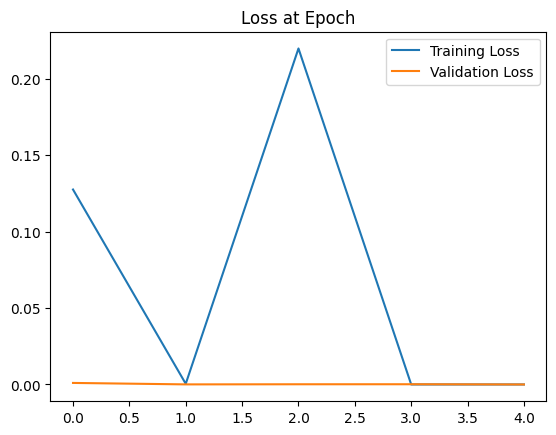

In [48]:
#graph the loss at epoch
train_losses=[tl for tl in train_losses]
plt.plot(train_losses,label="Training Loss")
plt.plot(test_losses,label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()

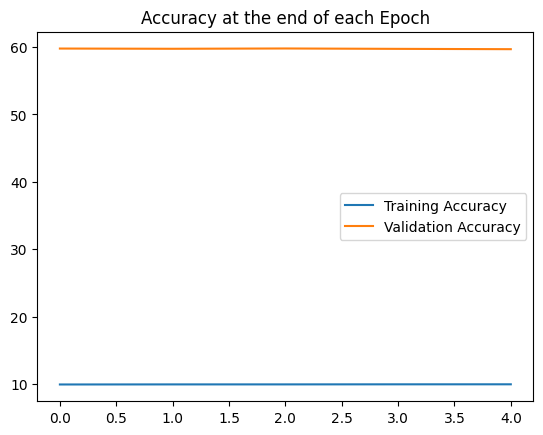

In [54]:
#graph the accuracy at the end of each epoch
plt.plot([t/600 for t in train_correct],label="Training Accuracy")
plt.plot([t/100 for t in test_correct],label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch")
plt.legend()

In [52]:
train_correct

[tensor(59590), tensor(59657), tensor(59668), tensor(59724), tensor(59744)]

In [59]:
test_load_everything=DataLoader(test_data,batch_size=10000,shuffle=False)

In [60]:
with torch.no_grad():
  correct=0
  for X_test,y_test in test_load_everything:
    y_val=model(X_test)
    predicted=torch.max(y_val,1)[1]
    correct+=(predicted==y_test).sum()

In [61]:
correct.item()/len(test_data)*100

98.66

In [62]:
test_data[4143]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [63]:
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [64]:
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

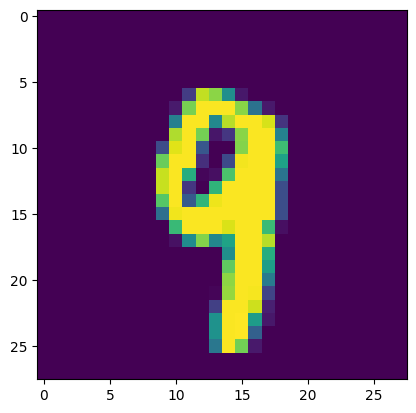

In [65]:
plt.imshow(test_data[4143][0].reshape(28,28))

In [70]:
model.eval()
with torch.no_grad():

  new_prediction=model(test_data[4143][0].view(1,1,28,28))

In [71]:
new_prediction

tensor([[-2.8515e+01, -2.6803e+01, -3.7107e+01, -2.2431e+01, -1.2727e+01,
         -2.5805e+01, -4.0922e+01, -2.1385e+01, -2.3612e+01, -2.9802e-06]])

In [73]:
new_prediction.argmax()

tensor(9)